## From
https://blog.dominodatalab.com/interactive-dashboards-in-jupyter/

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from ipywidgets import widgets

In [24]:
%matplotlib notebook
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from ipywidgets import *

from IPython.display import display

from IPython.html import widgets

plt.style.use('ggplot')

NUMBER_OF_PINGS = 4

# displaying the text widget
text = widgets.Text(description="Domain to ping", width=200)
display(text)

In [10]:
from IPython.display import display
text = widgets.Text()
display(text)

def handle_submit(sender):
    print(text.value)
    
text.on_submit(handle_submit)

my input


In [12]:
button = widgets.Button(description="Click Me!")
display(button)

def on_button_clicked(b):
    print("Button clicked.")
    
button.on_click(on_button_clicked)

Button clicked.


## Interact:
### Form of display depends on type of second arg:
###   integer: slider
###   Boolean: check box
###   String: text box

In [14]:
def f(x):
    print(x)
    
interact(f,x=10)

9


In [15]:
interact(f,x=True)

True


In [16]:
interact(f, x="text")

text


<function __main__.f>

In [17]:
outputText = widgets.Text()
outputText

## When running this, keep your eye on where
###  outputText is located (usually in the cell above this)
###  It's contents will be changed by the below cell

In [21]:
inputText = widgets.Text()

def makeUpperCase(sender):
    outputText.value = inputText.value.upper()

inputText.on_submit(makeUpperCase)
inputText

In [36]:
from IPython.html.widgets import *
t = np.arange(0.0, 1.0, 0.1)
t

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])

In [38]:
def pltsin(f):
    print("f is", f)
    plt.plot(t, np.sin(2*np.pi*t*f))
    plt.show()
    
interact(pltsin, f=(1,10,0.1))

f is 6.7


In [40]:
plt.style.use('ggplot')

NUMBER_OF_PINGS = 4

# displaying the text widget
text = widgets.Text(description="Domain to ping", width=200)
display(text)

AttributeError: 'list' object has no attribute 'astype'

AttributeError: 'list' object has no attribute 'astype'

<IPython.core.display.Javascript object>


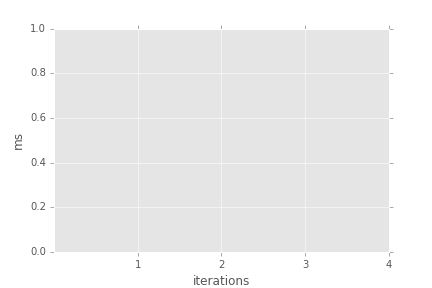

([<matplotlib.axis.XTick at 0x7fea6b1769e8>,
 <a list of 4 Text xticklabel objects>)

In [55]:
# preparing the plot
data = pd.DataFrame()
x = range(1,NUMBER_OF_PINGS+1)

plots = dict()
fig, ax = plt.subplots()
plt.xlabel('iterations')
plt.ylabel('ms')
plt.xticks(x)

In [56]:
# preparing a container to put in created checkbox per domain
checkboxes = []
cb_container = widgets.HBox()
display(cb_container)

# add button that updates the graph based on the checkboxes
button = widgets.Button(description="Update the graph")


In [57]:
# function to deal with the checkbox update button 
# function to deal with the added domain name
def handle_submit(sender):
    # a part of the magic inside python : pinging
    res = !ping -c {NUMBER_OF_PINGS} {text.value}
    hits = res.grep('64 bytes').fields(-2).s.replace("time=","").split()
    
    if len(hits) == 0:
        print("Domain gave error on pinging")
    else:
        # rebuild plot based on ping result
        data = hits
        data = data.astype(float)
        plots, = ax.plot(x, data, label=text.value)
        plt.legend()
        plt.draw()

        # add a new checkbox for the new domain
        checkboxes.append(widgets.Checkbox(description = text.value, value=True, width=90))
        cb_container.children=[i for i in checkboxes]

        if len(checkboxes) == 1:
            display(button)


In [58]:
# function to deal with the checkbox update button 
def on_button_clicked(b):
    for c in cb_container.children:
        if not c.value:
            plots.set_visible(False)
        else:
            plots.set_visible(True)
       
    plt.legend()
    plt.draw()
    button.on_click(on_button_clicked)

In [59]:
text.on_submit(handle_submit)

plt.show()